## Phase 2 - Flatiron Data Science 
Project focused on Inferential Analysis: Heart Disease (Dataset from UCI)

By Rashmi Chauhan

### Introduction
Cardiovascular diseases (CVDs) or heart disease are the number one cause of death globally with 17.9 million death cases each year. 

Coronary artery disease (CAD) is associated with several modifiable risk factors pertaining to lifestyle and intervention.
Timing of detection and diagnostic accuracy are especially relevant in the clinical management of patients with CAD.


### About Dataset

UCI Heart Disease Dataset (from UCI repository)



It has Patient data from Cleveland hospitalI
It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), slope (the slope of the peak exercise ST segment), number of major vessels and Thalassemia.


In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, levene, kruskal
from statsmodels.stats.multicomp import MultiComparison
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [5]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [7]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

Check data types:

In [11]:
df.nunique()

age                               41
sex                                2
chest_pain_type                    4
resting_blood_pressure            49
cholestoral                      152
fasting_blood_sugar                2
rest_ecg                           3
Max_heart_rate                    91
exercise_induced_angina            2
oldpeak                           40
slope                              3
vessels_colored_by_flourosopy      5
thalassemia                        4
target                             2
dtype: int64

In [12]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object') 
df['slope'] = df['slope'].astype('object')
df['thalassemia '] = df['thalassemia'].astype('object')

In [13]:
df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
thalassemia                       object
dtype: object

### Observation:

My data:
2 types of sex (male or female),
4 types of chest pain,
2 types of fasting_blood_sugar(less than or greater than),
3 types of rest_ecg,
4 types of thalassemia,
5 types of colored by flourosopy,
3 types of slope,
2 types of induced angina(yes or no)

### EDA on Heart Disease Dataset

In [16]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target',
       'thalassemia '],
      dtype='object')

In [17]:
print(df.target.value_counts())
df['target'].value_counts()
     

target
1    526
0    499
Name: count, dtype: int64


target
1    526
0    499
Name: count, dtype: int64

In [18]:
print(df.sex.value_counts())
df['sex'].value_counts()

sex
Male      713
Female    312
Name: count, dtype: int64


sex
Male      713
Female    312
Name: count, dtype: int64

### **How do different types of chest pain influence the risk of a heart attack?**

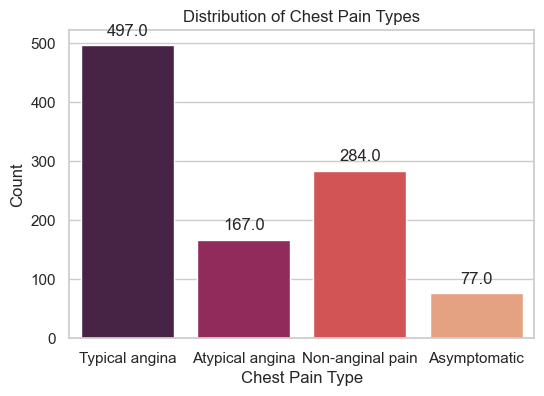

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
bar_plot = sns.countplot(x='chest_pain_type', data=df, palette= "rocket")

# Adding annotations
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

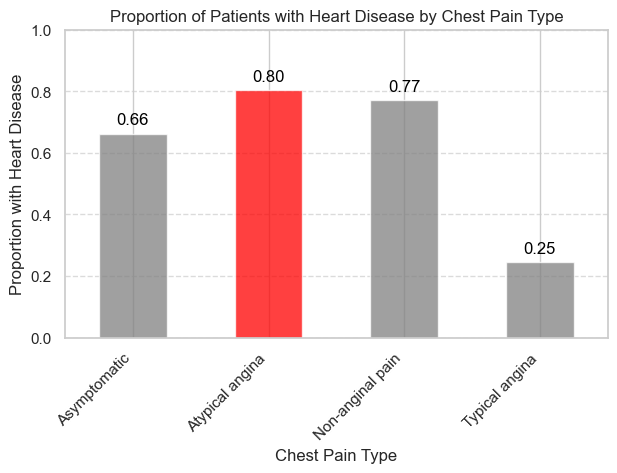

In [237]:
# Plotting the proportion of patients with heart disease by chest pain type
cp_counts = df.groupby('chest_pain_type')['target'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(7, 4))
colors = ['red' if i == cp_counts[1].idxmax() else 'grey' for i in cp_counts[1].index]
bars = cp_counts[1].plot(kind='bar', color=colors, alpha=0.75)
plt.title('Proportion of Patients with Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion with Heart Disease')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding proportion labels on top of bars
for i, val in enumerate(cp_counts[1]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', va='bottom', color='black')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

Observation:
Individuals with atypical angina are at risk for heart attacks if their condition goes unrecognized or untreated. Delayed treatment can lead to more severe cardiac events.



### **How does gender influence an individual’s risk of experiencing a heart attack?**

---

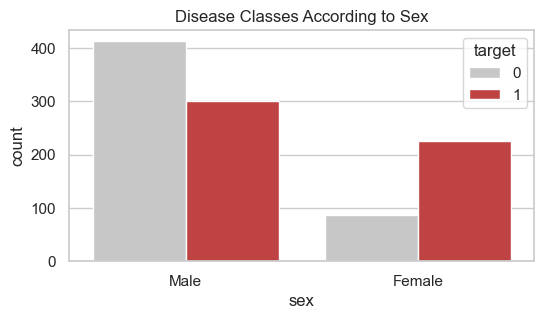

In [251]:
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")

# Define a custom palette: red for target=1 and grey for target=0
custom_palette = {0: "#c7c7c7", 1: "#d32f2f"}  # Grey and Red colors

# Create the count plot with the custom palette
bar_plot = sns.countplot(x='sex', hue='target', data=df, palette=custom_palette)

# Set the title
bar_plot.set_title('Disease Classes According to Sex')

# Show plot
plt.show()

### **How does age affect the risk of experiencing a heart attack?**

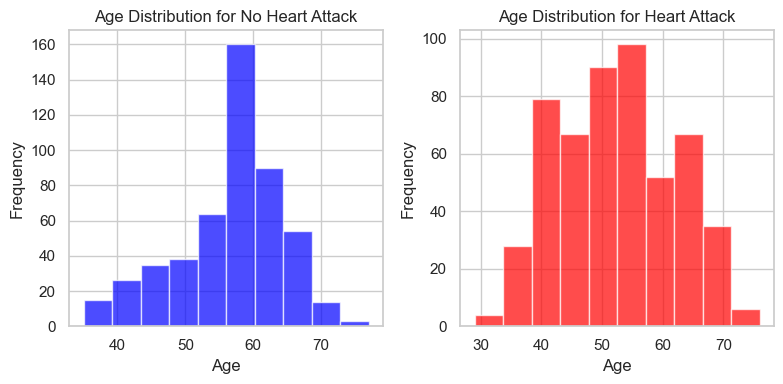

In [115]:
# Histograms for Age distribution in both groups (Heart Attack Incidence: 0 and 1)
plt.figure(figsize=(8, 4))

# Histogram for patients without a heart attack
plt.subplot(1, 2, 1)
plt.hist(df[df['target'] == 0]['age'], bins=10, alpha=0.7, color='blue')
plt.title('Age Distribution for No Heart Attack')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Histogram for patients with a heart attack
plt.subplot(1, 2, 2)
plt.hist(df[df['target'] == 1]['age'], bins=10, alpha=0.7, color='red')
plt.title('Age Distribution for Heart Attack')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

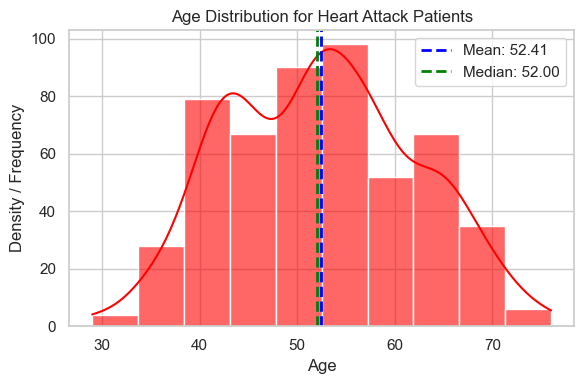

In [245]:
# Data for patients with a heart attack
heart_attack_ages = df[df['target'] == 1]['age']

# Calculate median and mean
median_age = heart_attack_ages.median()
mean_age = heart_attack_ages.mean()

# Plotting the histogram and KDE
plt.figure(figsize=(6, 4))

# Histogram
sns.histplot(heart_attack_ages, bins=10, kde=True, color='red', alpha=0.6)

# KDE plot only (if needed separately, can be commented out if using kde=True in sns.histplot)
# sns.kdeplot(heart_attack_ages, color='darkblue', linewidth=2)
# Plotting the mean and median
plt.axvline(mean_age, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')

# Titles and labels
plt.title('Age Distribution for Heart Attack Patients')
plt.xlabel('Age')
plt.ylabel('Density / Frequency')

# Adding legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Observation:

1. The minimum age with a heart disease is 29 yrs and the maximum is 77 yrs per the data set.

2. Most people get heart disease between 52 - 53 yrs age.

3. Age - The older age increases the risk of narrowing arteries.

4. 
Gender: Men are at higher risk.

5. Individuals with atypical angina are at risk for heart attacks if their condition goes unrecognized or untreated.



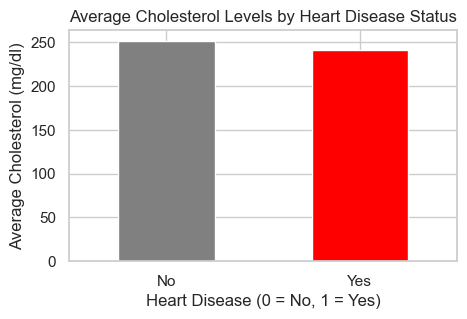

In [243]:
# Calculate the average cholesterol levels for patients with and without heart disease
avg_cholesterol = df.groupby('target')['cholestoral'].mean()

# Plotting
plt.figure(figsize=(5, 3))
avg_cholesterol.plot(kind='bar', color=['grey', 'red'])

plt.title('Average Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Average Cholesterol (mg/dl)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(True, axis='y')

plt.show()

### **How does exercise-induced angina correlate with the risk of a heart attack?**

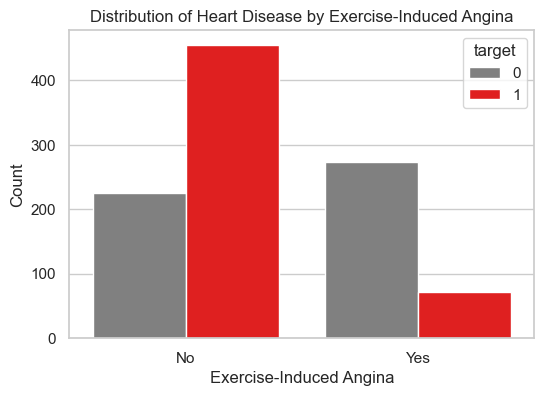

In [241]:
# Define custom colors for the hue categories
custom_palette = {1: 'red', 0: 'grey'}

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='exercise_induced_angina', hue='target', palette=custom_palette)
plt.title('Distribution of Heart Disease by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.show()

## **Inferential Analysis**

---

### **Is there a significant difference in age between patients who have had a heart attack and those who have not?**

Null Hypothesis (H₀): There is no significant difference in the mean age between patients who have had a heart attack and those who have not. (The mean age of both groups is the same.)

Alternative Hypothesis (H₁): There is a significant difference in the mean age between patients who have had a heart attack and those who have not. (The mean age of the two groups is different.)

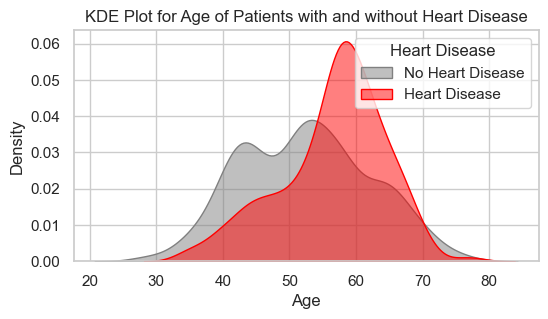

In [235]:
# Map target values to 'No' and 'Yes'
df['target_label'] = df['target'].map({0: 'No', 1: 'Yes'})

# KDE plot
plt.figure(figsize=(6, 3))
sns.kdeplot(data=df, x='age', hue='target_label', fill=True, common_norm=False, alpha=0.5, palette={'No': 'red', 'Yes': ''})
plt.title('KDE Plot for Age of Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'], loc='upper right')
plt.show()

In [106]:
# Create samples for t-test
age_no_heart_attack = df[df['target'] == 0]['age']
age_with_heart_attack = df[df['target'] == 1]['age']

t_stat, p_value = ttest_ind(age_no_heart_attack, age_with_heart_attack)
print(f'T-test for Age: t-statistic = {t_stat}, p-value = {p_value}')

if p_value < 0.01:
    print("Reject the null hypothesis, indicating a significant difference in the mean age of patients who had heart attack.")
else:
    print("Fail to reject the null hypothesis, indicating no significant difference in the mean age of patients who had heart attack.")

T-test for Age: t-statistic = 7.535591207962243, p-value = 1.0677220241596988e-13
Reject the null hypothesis, indicating a significant difference in the mean age of patients who had heart attack.


In [227]:
# Split the ages based on the presence of heart disease
age_no_heart_attack = df[df['target'] == 0]['age']
age_with_heart_attack = df[df['target'] == 1]['age']

# Perform the Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(age_no_heart_attack, age_with_heart_attack, alternative='two-sided')

# Output the results
print("Mann-Whitney U statistic:", stat)
print("p-value:", p_value)

# Determine whether to reject or fail to reject the null hypothesis
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in age distributions between patients with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in age distributions between patients with and without heart disease.")

Mann-Whitney U statistic: 167644.0
p-value: 1.4676312173703235e-14
Reject the null hypothesis: There is a significant difference in age distributions between patients with and without heart disease.


There is a significant difference in age distributions between patients with and without heart disease.


### **Is there a statistically significant association between sex and the incidence of heart attacks among the study population?**


Null Hypothesis (H₀): There is no association between sex and heart attack incidence.

Alternative Hypothesis (H₁): There is an association between sex and heart attack incidence.


In [30]:
from scipy.stats import chi2_contingency 

# Create contingency table
contingency_table = pd.crosstab(df['sex'], df['target'])

# Perform chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Test for Sex: chi2-statistic = {chi2_stat}, p-value = {p_val}')

Chi-Square Test for Sex: chi2-statistic = 78.86305133922973, p-value = 6.656820681726434e-19


Given that the p-value is extremely small (less than the significance level of 0.05), we can reject the null hypothesis. 

This suggests that there is a statistically significant association between sex and the incidence of heart attacks in your study population.

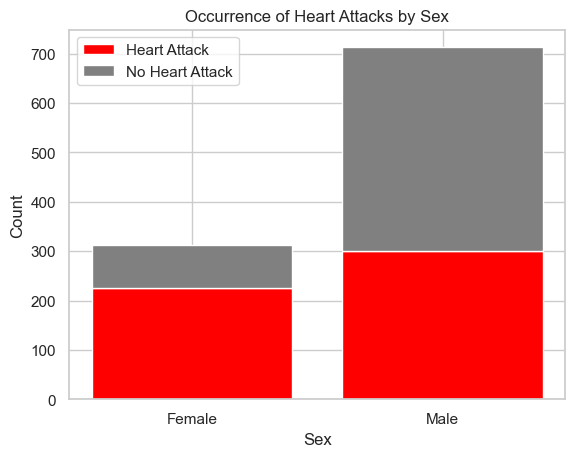

In [181]:
# Extract counts
sex_labels = contingency_table.index
heart_attack_counts = contingency_table[1]  # Assuming '1' represents heart attack
no_heart_attack_counts = contingency_table[0]  # Assuming '0' represents no heart attack

# Plotting
fig, ax = plt.subplots()
index = range(len(sex_labels))

# Plot stacked bars
plt.bar(index, heart_attack_counts, color='red', label='Heart Attack')
plt.bar(index, no_heart_attack_counts, color='grey', bottom=heart_attack_counts, label='No Heart Attack')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Occurrence of Heart Attacks by Sex')
plt.xticks(index, sex_labels)
plt.legend()

plt.show()


### Is there a statistically significant difference in the mean age among patients with different types of chest pain?

Null Hypothesis (H₀): There is no significant difference in the mean age among patients with different types of chest pain.

Alternative Hypothesis (H₁): There is a significant difference in the mean age among patients with different types of chest pain.

Since the distribution of data is not normal hence we have to perform Mann-Whitney U test

In [211]:
# Sample for age and chest pain type
age_by_pain_type = [df[df['chest_pain_type'] == pain_type]['age'] for pain_type in df['chest_pain_type'].unique()]
f_stat, p_val = f_oneway(*age_by_pain_type)
print(f'ANOVA for Age by Chest Pain Type: F-statistic = {f_stat}, p-value = {p_val}')

ANOVA for Age by Chest Pain Type: F-statistic = 12.713293588650242, p-value = 3.672018484649832e-08


In [215]:
# Sample for age and chest pain type
age_by_pain_type = [df[df['chest_pain_type'] == pain_type]['age'] for pain_type in df['chest_pain_type'].unique()]

test_stat, p_value = stats.kruskal(*age_by_pain_type)
                            
print("P-value:", p_value)

P-value: 3.0116094453187656e-09


In [ ]:
The P value is much smaller than 0.01, indicating a very strong statistical significance between age and chest pain types.

## Recommendations:

Tailoring treatment plans based on individual patient profiles.


Early identification and intervention can reduce the incidence of severe cardiac events, leading to better patient outcomes and reduced healthcare costs.


Design effective patient engagement strategies to improve adherence to lifestyle modifications and medical treatments

#### External References:

Acute Chest Pain in Adults: Outpatient Evaluation | AAFP

The Effect of Exercise-Induced Angina (exng) on Risk of Heart Attack

Relationship between Resting Electrocardiographic Parameters and Estimated 10‐Year Risk for Coronary Heart Disease in Healthy Adults in the USA - PMC (nih.gov)
